<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Finite-volumes-8---finite-difference-approximations" data-toc-modified-id="Finite-volumes-8---finite-difference-approximations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Finite volumes 8 - finite-difference approximations</a></span><ul class="toc-item"><li><span><a href="#Learning-goals" data-toc-modified-id="Learning-goals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Learning goals</a></span></li><li><span><a href="#Finite-difference-approximations-to-derivatives" data-toc-modified-id="Finite-difference-approximations-to-derivatives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Finite-difference approximations to derivatives</a></span><ul class="toc-item"><li><span><a href="#Intuition" data-toc-modified-id="Intuition-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Intuition</a></span></li><li><span><a href="#Backward--difference" data-toc-modified-id="Backward--difference-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Backward  difference</a></span></li><li><span><a href="#Forward-difference" data-toc-modified-id="Forward-difference-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Forward difference</a></span></li><li><span><a href="#Central-difference" data-toc-modified-id="Central-difference-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Central difference</a></span></li><li><span><a href="#Example:-approximation-error" data-toc-modified-id="Example:-approximation-error-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Example: approximation error</a></span></li><li><span><a href="#Assess-error" data-toc-modified-id="Assess-error-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Assess error</a></span></li><li><span><a href="#Taylor-Series-analysis-of-finite-difference-approximations" data-toc-modified-id="Taylor-Series-analysis-of-finite-difference-approximations-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Taylor Series analysis of finite-difference approximations</a></span></li><li><span><a href="#Summary-of-finite-difference-approximations" data-toc-modified-id="Summary-of-finite-difference-approximations-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Summary of finite difference approximations</a></span></li><li><span><a href="#Implications-for-finite-volumes" data-toc-modified-id="Implications-for-finite-volumes-1.2.9"><span class="toc-item-num">1.2.9&nbsp;&nbsp;</span>Implications for finite volumes</a></span></li></ul></li></ul></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Assignment</a></span><ul class="toc-item"><li><span><a href="#Finite-difference-stencil-for-diffusion" data-toc-modified-id="Finite-difference-stencil-for-diffusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Finite difference stencil for diffusion</a></span><ul class="toc-item"><li><span><a href="#1-D-Steady-state-diffusion-with-constant-coefficients" data-toc-modified-id="1-D-Steady-state-diffusion-with-constant-coefficients-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>1-D Steady-state diffusion with constant coefficients</a></span></li></ul></li><li><span><a href="#Approximation-error" data-toc-modified-id="Approximation-error-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Approximation error</a></span></li></ul></li><li><span><a href="#Reflection" data-toc-modified-id="Reflection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reflection</a></span></li></ul></div>

# Finite volumes 8 - finite-difference approximations



## Learning goals
1. Be able to develop finite-difference approximations for first and second derivatives (total and partial).
2. Be able to determine the truncation error and order of a finite - difference approximation from Taylor-series analysis.
3. Can construction forwards, backwards and central finite difference approximation stencils.
4. Can  distinguish truncation error from roundoff error.
5. Can identify the controls truncation error, and recognize pathological situations which lead to large truncation errors.
6. Using a finite-difference stencil, can construct the system of equations for a finite-difference approximation to an ordinary or partial differential equation, including defining the grid of nodes and applying first-type (Dirichlet) and second-type (Neumann) boundary conditions.
7. Can compare and contrast and finite-difference approximation to a finite-volume approximation (this last learning will only become apparent after we introduce the integral formulation of the finite-volume method and of our conservation PDEs).

Advanced reference: LeVeque, Randal J, *Finite difference methods for ordinary and partial differential equations: Steady-state and time-dependent problems,* 2007 (can be downloaded from UBC library here: __[UBC library link](http://gw2jh3xr2c.search.serialssolutions.com/?ctx_ver=Z39.88-2004&ctx_enc=info%3Aofi%2Fenc%3AUTF-8&rfr_id=info%3Asid%2Fsummon.serialssolutions.com&rft_val_fmt=info%3Aofi%2Ffmt%3Akev%3Amtx%3Abook&rft.genre=book&rft.title=Finite+difference+methods+for+ordinary+and+partial+differential+equations&rft.au=LeVeque%2C+Randall+J&rft.date=2007-01-01&rft.pub=Society+for+Industrial+and+Applied+Mathematics&rft.isbn=9780898716290&rft.externalDocID=SIAMB0000334&paramdict=en-US)__ 

## Finite-difference approximations to derivatives

In notebook `6_finite_volume_4.ipynb` (https://phaustin.github.io/eosc213/web_notebooks/6_finite_volume_4.html) we were inspired to approximate the $x$ component of the gradient in concentration as

<br><br>
\begin{align}
{\partial c \over \partial x} &\approx  {c(x+\Delta x) - c(x)\over \Delta x} \label{fd881}\\
\end{align}
<br><br>
where $\Delta x$ is not infinitesimal, based upon the definition of the derivative where it is:
<br><br>

\begin{align}
{\partial c \over \partial x} &= \lim_{\Delta x \rightarrow 0} {c(x+\Delta x) - c(x)\over \Delta x} \label{fd882}\\
\end{align}

where $c(x+\Delta x)$ is notation for "the concentration at the point $x+\Delta x, y, z$".

<br><br>

Here we want to evaluate the accuracy of these finite-difference approximations. To do that, we need to look at **Taylor series representations** of functions.
<br><br>



### Intuition

Let's first look at a simple function that we know so we can calculate the derivatives using calculus and compare them to the our finite-difference approximations. Then we'll dig into the theory using Taylor Series.
<br><br>
Let's try the following function which is easy to plot and differentiate:
<br><br>
\begin{align}
f(x)&= -(x - 2.5)^3 + 5
\end{align}
<br><br>
We can implement it in python below as `func_1`.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def func_1(x):
    """
    A simple function to be used to investigate test finite-difference approximations to derivatives

    Parameters
    ----------
    x: (float)
        function argument

    Returns
    -------
    func_1(x): (float)
        the value of the function when argument is x
    """
    return -(x - 2.5) ** 3 + 5.0

In [3]:
def dfunc_1(x):
    """
    The derivative of func_1

    Parameters
    ----------
    x: (float)
        function argument

    Returns
    -------
    dfunc_1(x): (float)
        the derivative of the function when argument is x
    """
    return -3.0 * (x - 2.5) ** 2

Let's plot it over short interval to see what it looks like. Using a rather coarse separation between points ($\Delta x = 1.$):

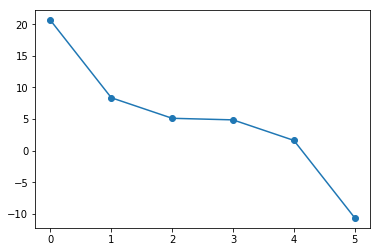

In [4]:
x_pts = np.arange(0.0, 6.0, 1.0)  # creates an array [-3.,-2.,..., 2.0]
y_pts = func_1(
    x_pts
)  # computes the function at each point in x_pts, stores result in array y_pts
plt.plot(x_pts, y_pts, "-o")  # plot with points

In [5]:
# print out points
print(f"  x   f(x)")
for j in range(len(x_pts)):
    print(f"{x_pts[j]: 3.1f}, {y_pts[j]: 3.2f}")

  x   f(x)
 0.0,  20.62
 1.0,  8.38
 2.0,  5.12
 3.0,  4.88
 4.0,  1.62
 5.0, -10.62



### Backward  difference

Let's look at evaluating the derivative at $x=2.0$ using values of the function at neighbouring  points. One option is to make a straight-line approximation using the value of the function at $x=1$ and $x=2$:
<br><br>
\begin{align}
\left.{df(x)\over dx} \right| & \approx \frac{f(x)-f(x-\Delta x)}{\Delta x} \\
\left.{df(x)\over dx} \right|_{x=2} & \approx \frac{f(2)-f(1)}{2-1} = (5.12 - 8.38)/1.0 = -3.26\\
\end{align}
<br><br>

So, we approximate the slope at $x=2$ by the slope of the line that connects $f(1)$ and $f(2)$:


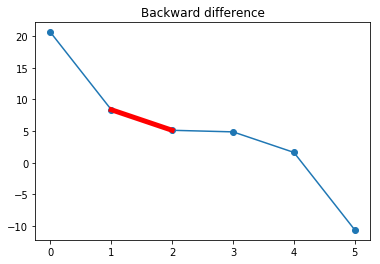

In [6]:
plt.plot(x_pts, y_pts, "-o")  # plot the function
plt.title("Backward difference")
plt.plot(x_pts[1:3], y_pts[1:3], "-r", linewidth=5)  # plot the line segment

### Forward difference

Here we make a straight-line approximation for the derivative at $x=2$ using the value of the function at $x=3$ and $x=2$:
<br><br>
\begin{align}
\left.{df(x)\over dx} \right| & \approx \frac{f(x+\Delta x)-f(x)}{\Delta x} \\
\left.{df(x)\over dx} \right|_{x=2} & \approx \frac{f(3)-f(2)}{3-2} = (4.88 - 5.12)/1.0 = -0.24\\
\end{align}
<br><br>

Shown graphically:

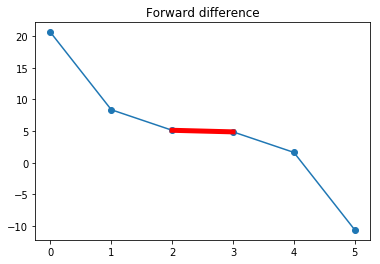

In [7]:
plt.plot(x_pts, y_pts, "-o")
plt.title("Forward difference")

plt.plot(x_pts[2:4], y_pts[2:4], "-r", linewidth=5)

### Central difference

Here we make a straight-line approximation for the derivative at $x=2$ using the value of the function at $x=3$ and $x=1$:
<br><br>
\begin{align}
\left.{df(x)\over dx} \right| & \approx \frac{f(x+\Delta x)-f(x-\Delta x)}{2\Delta x} \\
\left.{df(x)\over dx} \right|_{x=2} & \approx \frac{f(3)-f(1)}{3-1} = {(4.88 - 8.38)\over 2.0} = -1.75\\
\end{align}
<br><br>

Shown graphically:

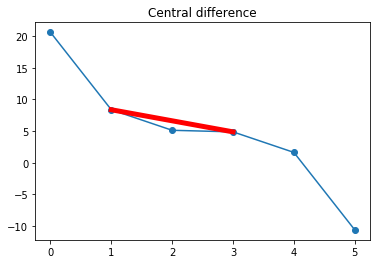

In [8]:
plt.plot(x_pts, y_pts, "-o")
plt.title("Central difference")

plt.plot((x_pts[1], x_pts[3]), (y_pts[1], y_pts[3]), "-r", linewidth=5)

Collecting them all together, and including the tangent line at that point, which is computed using the exact derivative:

(0, 5.0, 3.0, 10.0)

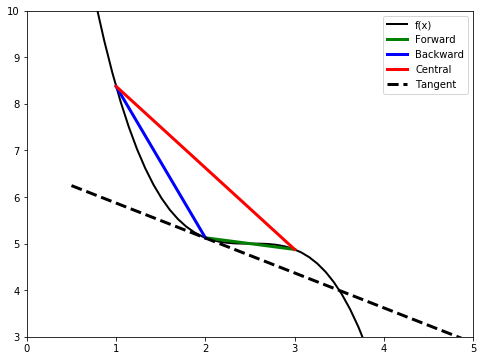

In [9]:
x_pts2 = np.linspace(0.5, 5.0)  # x points at which to plot tangent line
tangent = 5.12 - 3.0 * 0.5 ** 2 * (
    x_pts2 - 2.0
)  # formula for the tangent line at x = 2
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(x_pts2, func_1(x_pts2), "k", linewidth=2, label="f(x)")
ax.plot(x_pts[2:4], y_pts[2:4], "-g", linewidth=3, label="Forward")
ax.plot(x_pts[1:3], y_pts[1:3], "-b", linewidth=3, label="Backward")
ax.plot((x_pts[1], x_pts[3]), (y_pts[1], y_pts[3]), "-r", linewidth=3, label="Central")
ax.plot(x_pts2, tangent, "--k", linewidth=3, label="Tangent")
ax.legend(loc="best")
ax.axis((0, 5.0, 3.0, 10.0))

### Example: approximation error

Let's compute the error in the approximations at $x=2$.
<br><br>


Exact derivative at x = 2.00, df/dx = -0.7500
     FD approximation                          |error|
 forward   backward   central        forward   backward   central 
  -0.250   -3.250     -1.750           0.500     2.500      1.000
  -0.250   -1.750     -1.000           0.500     1.000      0.250
  -0.438   -1.188     -0.812           0.312     0.438      0.062
  -0.578   -0.953     -0.766           0.172     0.203      0.016
  -0.660   -0.848     -0.754           0.090     0.098      0.004


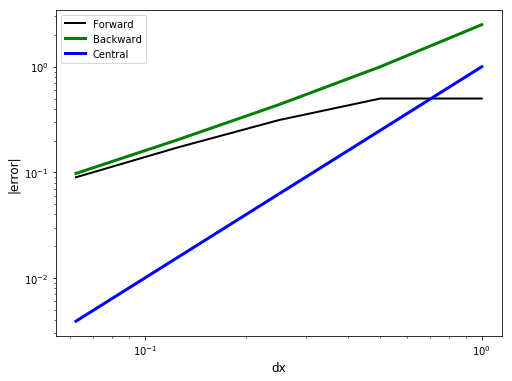

In [10]:
x = 2.0
exact_d = dfunc_1(x)  # exact derivative coded above
print(f"Exact derivative at x = {x:2.2f}, df/dx = {exact_d:3.4f}")
print(f"     FD approximation                          |error|")
print(f" forward   backward   central        forward   backward   central ")

# Compute the error for a sequence of values of dx that decrease by a factor of two in size
dx_vals = np.array([1.0, 0.5, 0.25, 0.125, 0.0625])

# python - empty arrays that will hold the errors as we loop through the computation for different dx
for_err = []
back_err = []
cent_err = []

# python iteration over elements in the np array dx_vals
for dx in np.nditer(dx_vals):
    # to avoid repeated function calls (for efficiency) store function calls in temporary variables
    f_xpdx = func_1(x + dx)  # f(x+dx) value of the function at x+dx
    f_x = func_1(x)  # f(x) value of the function at x
    f_xmdx = func_1(x - dx)  # f(x-dx) value of the function at x-dx

    for_dif = (f_xpdx - f_x) / dx  # compute forward, backward and central difference
    back_dif = (f_x - f_xmdx) / dx
    cent_dif = (f_xpdx - f_xmdx) / (2.0 * dx)

    # compute the absolute value of the error, add to a list using .append method
    for_err.append(abs(for_dif - exact_d)) 
    back_err.append(abs(back_dif - exact_d))
    cent_err.append(abs(cent_dif - exact_d))
    # errors are now stored in lists  - these are not numpy arrays
    sv = [
        f"{item:8.3f}"
        for item in [
            for_dif,
            back_dif,
            cent_dif,
            for_err[-1],
            back_err[-1],
            cent_err[-1],
        ]
    ]
    # the notation {sv[i]:8>} means print element i of sv using format 8>. Format 8> means right aligned with 8 digits
    print(
        f"{sv[0]:8>} {sv[1]:8<}   {sv[2]:8<}        {sv[3]:8>}  {sv[4]:8>}   {sv[5]:8>}"
    )


# must convert lists that contain errors to numpy arrays to plot with matplotlib
np.asarray(for_err)
np.asarray(back_err)
np.asarray(cent_err)

# plot it!
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.loglog(dx_vals, for_err, "k", linewidth=2, label="Forward")
ax.loglog(dx_vals, back_err, "-g", linewidth=3, label="Backward")
ax.loglog(dx_vals, cent_err, "-b", linewidth=3, label="Central")
ax.set_xlabel("dx", fontsize="large")
ax.set_ylabel("|error|", fontsize="large")
ax.legend(loc="best")

### Assess error

Contemplate

1. Which approximation is the most accurate?
* Does the error depend upon $dx$?
* For which approximation does the error decrease the fastest as $dx$ shrinks?

<br><br><br>
In the application of finite differences to solve differential equations, the function that we are solving for is not known a priori, so the error in the approximation cannot be computed. For that reason, when we assess a finite-difference approximation, we look at **how quickly the error shrinks as we shrink** $\Delta x$. To see that we have to revisit Taylor series.


### Taylor Series analysis of finite-difference approximations

Taylor series reference: Khan Academy https://www.khanacademy.org/math/ap-calculus-bc/bc-series-new/bc-10-11/v/maclaurin-and-taylor-series-intuition
UBC Peter Wall https://www.math.ubc.ca/~pwalls/math-python/differentiation/
<br><br> Video - Taylor series and finite differences https://www.coursera.org/lecture/computers-waves-simulations/w2v3-taylor-series-PEN8L
<br><br><br>
#### Approach
* manipulate Taylor series approximations to develop exact expressions for derivatives.
* compare these expressions to finite-difference approximations and thereby develop expressions for the **truncation error** = exact - approximate.

<br><br><br>
Recall a Taylor series gives you the value of a function at a location $x_i + dx$ using the value of the function and its derivatives at the point $x_i$. Functions that can be approximated in this way are called analytic https://en.wikipedia.org/wiki/Analytic_function.

<br><br>
Let's represent a function $f$ at points $x_i+\Delta x$ and $x_i-\Delta x$:
\begin{align}
f(x_i+\Delta x) &= f(x_i) + (\Delta x){df(x_i)\over dx} + {(\Delta x)^2\over 2!}{d^2f(x_i)\over dx^2} + {(\Delta x)^3\over 3!}{d^3f(x_i)\over dx^3} \nonumber \\
&+ \cdots +  {(\Delta x)^n\over n!}{d^nf(x_i)\over dx^n} + \cdots \label{8fd884} \\
f(x_i-\Delta x) &= f(x_i) + (-\Delta x){df(x_i)\over dx} + {(-\Delta x)^2\over 2!}{d^2f(x_i)\over dx^2} + {(-\Delta x)^3\over 3!}{d^3f(x_i)\over dx^3} + \nonumber\\
&\cdots +  {(-\Delta x)^n\over n!}{d^nf(x_i)\over dx^n} + \cdots \label{8fd885} \\
\end{align}
<br><br>
#### Forward difference Taylor analysis
<br><br>
Subtract $f(x_i)$ from the Taylor approximation $f(x_i+\Delta x)$ \ref{8fd884}
<br><br>

\begin{align}
f(x_i+\Delta x) - f(x_i) &= (\Delta x){df(x_i)\over dx} + {(\Delta x)^2\over 2!}{d^2f(x_i)\over dx^2} + {(\Delta x)^3\over 3!}{d^3f(x_i)\over dx^3} + \cdots +  {(\Delta x)^n\over n!}{d^nf(x_i)\over dx^n} + \cdots \label{8fd886} \\
\end{align}
<br><br>
Solve for ${df(x_i)\over dx}$, the derivative at point $x_i$:
<br><br>
\begin{align}
{df(x_i)\over dx} & = \overbrace{{f(x_i+\Delta x) - f(x_i)\over \Delta x}}^\text{forward difference approximation} \nonumber\\
&- \overbrace{\frac{1}{\Delta x}\left[ {(\Delta x)^2\over 2!}{d^2f(x_i)\over dx^2} +
{(\Delta x)^3\over 3!}{d^3f(x_i)\over dx^3} + \cdots +  {(\Delta x)^n\over n!}{d^nf(x_i)\over dx^n} + \cdots \right]}^\text{truncation error} \label{8fd887} \\
\end{align}
<br><br>
Let's pause for a moment. The expression \ref{8fd887} is exact. In words this expression says that the exact derivative at point $x_i$ is given by the forward-difference approximation minus a **truncation error**, all the terms in the $[]$ braces. That is, true = approximate - error.
<br><br>
##### Truncation error
The forward difference truncation error is
<br><br>
\begin{align}
\left[ \underbrace{\frac{(\Delta x)}{2!}}_\text{leading term}{d^2f(x_i)\over dx^2} + \underbrace{(\Delta x)^2\over 3!}_\text{2nd term}{d^3f(x_i)\over dx^3} + \cdots +  {(\Delta x)^{n-1}\over n!}{d^nf(x_i)\over dx^n} + \cdots \right] \label{8fd888} \\
\end{align}
<br><br>
1. What controls the size of the truncation error?
* How can we characterize this truncation error?
<br><br>
##### Order of approximation
**Problem**: when we used finite-difference approximations to compute Euler timesteps or fluxes, we did not know the function, and therefore in general we don't know the values of the derivatives ${df(x_i)\over dx}$, ${d^2f(x_i)\over dx^2}$, etc, in the truncation error. So instead we focus on the effects of changing $\Delta x$ on the truncation error.
<br><br>

\begin{align*}
\begin{matrix}
  & & \text{leading term} & &\text{2nd term} \\
\text{Reduce }\quad \Delta x \quad \text{by}\quad 1/2 & \text{reduces by}\quad &1/2& \text{reduces by}\quad &1/4 \\
\text{Reduce }\quad \Delta x \quad \text{by}\quad 1/4 & \text{reduces by}\quad &1/4& \text{reduces by}\quad &1/16 \\
\text{Reduce }\quad \Delta x \quad \text{by}\quad 1/8 & \text{reduces by}\quad &1/8& \text{reduces by}\quad &1/64 \\
\end{matrix}
\end{align*}

<br><br>
When $\Delta x$ is reduced, the leading term $(\Delta x){df(x_i)\over dx}$ decreases the most slowly. When $\Delta x$ is reduced by a factor of 8, the leading term is reduced by a factor of 8, but the second term is reduced by a factor of 64. So, the error is dominated by the leading order behavior. Higher-order terms are eventually insignificant.
<br><br>
So, we now write
<br><br>
\begin{align}
{df(x_i)\over dx} & = \overbrace{{f(x_i+\Delta x) - f(x_i)\over \Delta x}}^\text{forward difference approximation} \nonumber\\
&- \overbrace{\left[ {(\Delta x)\over 2!}{d^2f(x_i)\over dx^2} + {(\Delta x)^2\over 3!}{d^3f(x_i)\over dx^3} + \cdots +  {(\Delta x)^{n-1}\over n!}{d^nf(x_i)\over dx^n} + \cdots \right]}^\text{truncation error} \label{8fd889} \nonumber \\
& = \overbrace{{f(x_i+\Delta x) - f(x_i)\over \Delta x}}^\text{forward difference approximation}  + \mathcal{O}(\Delta x) \label{8fd8810} \\
\end{align}
<br><br>
For this reason, we say that the forward difference approximation is **First order** because as $\Delta x \rightarrow 0$, the truncation error shrinks by $(\Delta x)^1$.

#### Backward difference Taylor analysis
<br><br>
Subtract expansion for $f(x_i-\Delta x)$, \ref{8fd885} from $f(x_i)$.
<br><br>
\begin{align}
{df(x_i)\over dx} & = \overbrace{{f(x_i) - f(x_i-\Delta x)\over \Delta x}}^\text{backward difference approximation}  + \mathcal{O}(\Delta x) \label{8fd8811} \\
\end{align}
<br><br>
The backward difference is also a **First order** approximation.

#### Central difference Taylor analysis
<br><br>
Subtract expansion for $f(x_i+ \Delta x)$, \ref{8fd884} from $f(x_i-\Delta x)$, \ref{8fd885}. Some terms cancel out, which leads to:
<br><br>
\begin{align}
{df(x_i)\over dx} & = \overbrace{{f(x_i + \Delta x) - f(x_i-\Delta x)\over 2\Delta x}}^\text{central difference approximation}  + \mathcal{O}(\Delta x)^2 \label{8fd88112} \\
\end{align}
<br><br>
The central difference is a **Second order** approximation because as $\Delta x \rightarrow 0$, the truncation error shrinks by $(\Delta x)^2$.

#### Second derivative
<br><br>
Add the Taylor expansions for $f(x_i+\Delta x)$ \ref{8fd884} and $f(x_i-\Delta x)$ \ref{8fd885}
<br><br>
\begin{align}
f(x_i + \Delta x) + f(x_i - \Delta x)&= 2 f(x_i) +   2{(\Delta x)^2\over 2!}{d^2f(x_i)\over dx^2} + 2\left[{(\Delta x)^4\over 4!}{d^4f(x_i)\over dx^4} + \cdots +  \right] \label{8fd8812} \\
\end{align}
<br><br>
Solve for ${d^2f(x_i)\over dx^2}$:
<br><br>
\begin{align}
{d^2f(x_i)\over dx^2}&= \overbrace{{f(x_i + \Delta x) -  2 f(x_i) + f(x_i - \Delta x)\over (\Delta x)^2}}^\text{central second derivative} + \mathcal{O}(\Delta x)^2   \label{8fd8813} \\
\end{align}
<br><br>
The central second derivative is also **second order**. Does that last expression remind you of something?

### Summary of finite difference approximations
We derived three approximations for the first derivative: forward, backward and central. Let's express them in terms of values of, say, concentration on a grid with constant grid spacing $\Delta x$ and
\begin{align*}
c_i = c(&x_i) \\
c_{i+1} = c(x_i &+\Delta x) \\
c_{i-1} = c(x_i &- \Delta x) \\
\end{align*}

#### First derivative
<br><br>
\begin{align}
\text{Forward} \qquad {dc(x_i)\over dx} =& {c_{i+1} - c_{i} \over \Delta x} + \mathcal{O}(\Delta x)   \label{8fd8814} \\
\text{Backward}\qquad {dc(x_i)\over dx}= & {c_{i} - c_{i-1} \over \Delta x} + \mathcal{O}(\Delta x)   \label{8fd8815} \\
\text{Central} \qquad{dc(x_i)\over dx} =& {c_{i+1} - c_{i-1} \over 2\Delta x} + \mathcal{O}(\Delta x)^2   \label{8fd8816}\\
\end{align}
<br><br>
#### Second derivative
<br><br>
\begin{align}
\text{Central} \qquad{d^2c(x_i)\over dx^2}= & {c_{i+1} -2 c_i + c_{i-1} \over (\Delta x)^2} + \mathcal{O}(\Delta x)^2   \label{8fd8817}\\
\end{align}
<br><br>

### Implications for finite volumes

#### Euler methods
<br><br>
In the forward and backward Euler (or explicit and implicit) time stepping the time derivative is approximated as:
<br><br>
\begin{align}
{dc\over dt} \approx {c(t+\Delta t) - c(t)\over \Delta t} \label{8fd8818}\\
\end{align}
<br><br>
What is the order of this approximation?
<br><br><br><br>
#### Fluxes
<br><br>
In our stencil, we approximate fluxes such as $j_{EC}$ as:
<br><br>
\begin{align}
j_{EC}&= D\theta {c_E - c_C \over \Delta x} \label{8fd8819}\\
\end{align}
<br><br>
Although this looks like a first order approximation,  it's really a second order. Why? It's because
the flux is really being approximated at the interface between the two gridblocks.
<br><br>
<img src="figures/flux_fd.png" alt="pic05" width="40%" >
<br><br>
To emphasize this, let's use this finite-difference notation, $c_{i-1}=c_C$, $c_{i+1} = c_E$ and write:
<br><br>
\begin{align}
j_{EC}&= D\theta {c_{i+1} - c_{i-1} \over \Delta x} \label{8fd8820}\\
\end{align}
<br><br>
The idea is that we are approximating the flux at a point $x_i$, between $x_{i+1}$ and $x_{i-1}$. So, the term looks like a central difference, where the grid points are separated by $\Delta x /2$. Accordingly, the order is order $\mathcal{O}((\Delta x)^2)$
<br><br>
#### Why not finite differences?
Finite-difference methods are straightforward to apply to simple equations (see the assignment below) with constant coefficients. However, for cases where the material properties vary with location (heterogeneous), they can be difficult to apply, for example, when the material properties are heterogeneous (diffusion coefficient, hydraulic conductivity, thermal conductivity, etc). A naive application can lead to **non-conservative** schemes - that is, ones that do not produce discrete approximations that are conservative. In contrast, the finite-volume method is a conservative discrete approximation.


# Assignment
## Finite difference stencil for diffusion
### 1-D Steady-state diffusion with constant coefficients
#### Partial differential equation for diffusion with homogeneous diffusion coefficient
To apply finite-difference approximations to solve differential equations, one simply replaces the derivatives that appear in the equations with a finite difference approximation. 
<br><br>
The partial differential equation for diffusion in three dimensions (not in porous media) is (see `9_pdes_1.ipynb`):
<br><br>
\begin{align}
&{\partial c\over \partial t} = {\partial \over \partial x}\left( D {\partial c \over \partial x}\right) + {\partial \over \partial y}\left( D {\partial c \over \partial y}\right)+ {\partial \over \partial z}\left( D {\partial c \over \partial z}\right)  \label{8fd8821}\\
\text{or}&\nonumber\\
&{\partial c\over \partial t} = \vec{\nabla} \cdot (D \vec{\nabla} c)\label{8fd8822}\\
\end{align}
<br> <br>
Write the partial differential equation for 1-D (in the $x$ direction) steady-state diffusion where the diffusion coefficient is spatially homogeneous.

**Put your equation here**
<br><br>

#### Finite-difference stencil for steady-state diffusion with homogeneous diffusion coefficient
<br><br>
To construct a finite-difference approximation to a differential equation, we simply replace the derivatives in the equation with a finite difference approximation. For example, for an ordinary differential equation of the form
<br><br>
\begin{align}
{dy\over dx} &= 2 y + 6 \label{8fd8824}\\
\end{align}
<br><br>
we develop a finite - difference stencil by replacing the derivative by a finite difference approximation. For example a forward difference approximation would be:
<br><br>
\begin{align}
{y(x_{i+1}) - y(x_i)\over \Delta x} &= 2 y(x_i) + 6 \label{8fd8825}\\
\end{align}
<br><br>
This is usual written using this notation: $y(x_i)\rightarrow y_i$:
<br><br>
\begin{align}
{y_{i+1} - y_i\over \Delta x} &= 2 y_i + 6 \label{8fd8826}\\
\end{align}
<br><br>
Write the finite-difference approximation for  1-D (in the $x$ direction) steady-state diffusion where the diffusion coefficient is spatially homogeneous (that is, for the equation you developed above). Use a centered approximation.
<br>
**Write your equation here **
<br><br>

#### Finite-volume stencil for steady-state diffusion with homogeneous diffusion coefficient
The finite-volume approximation for one-dimensional steady diffusion (not in porous media) is:
<br><br>
\begin{align}
&\left(D {c_E - c_C \over \Delta x} +   D {c_W - c_C \over \Delta x}   \right) (\Delta y) (\Delta z) =0 \label{8fd8823}\\
\end{align}
<br><br>
Write this equation for the case of homogeneous diffusion coefficient and constant gridblock size in the form $a_W c_W + a_C c_C + a_E c_E = rhs$ (that is, determine $a_W$, $a_C$, $a_E$ and $rhs$).
<br><br>
**Write your equation here.**


## Approximation error
Compute the forward, backward and central difference error of `cos(x)` at $x = 0.7$, starting at $\Delta x = 0.5$, and the halving $\Delta x$ 10 times (see code snippet below). Write a python code to:
1. compute and print the error for each value of $\Delta x$ for the forward,centered and backwards approximations.
* plot the error of each expression versus $\Delta x$ 
* What should the slope of this plot be for the different approximations?

<br> <br>
You can reuse most of the code above for this assignment.

In [ ]:
# code fragment to compute and print the values of delta x to be used in the error computation
dx_vals = 2.**-np.arange(1,11)
for dx in np.nditer(dx_vals):
    print(f"{dx:2.9f}")

In [ ]:
# add your code here

# Reflection

* What dictates your choice in the order of approximation used in a finite - difference approximation?
* How does the finite-difference approximation differ from the finite-volume approximation for the case you considered in the assignment above?